In [1]:
import pandas as pd
import numpy as np 
import torch
import torch.nn as nn
from torch.optim import SGD
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score, average_precision_score,accuracy_score
import scipy
print(scipy.__version__)

1.11.4


In [2]:
df=pd.read_csv('sph6004_assignment1_data.csv')
df['baseexcess']=(df['baseexcess_min']+df['baseexcess_max'])/2
df['ph']=(df['ph_min']+df['ph_max'])/2
df['temperature']=(df['temperature_min.1']+df['temperature_max.1'])/2
df['chloride']=(df['chloride_min']+df['chloride_max'])/2
df['total_protein']=(df['total_protein_min']+df['total_protein_max'])/2
df['aniongap']=(df['aniongap_min']+df['aniongap_max'])/2
df['bun']=(df['bun_min']+df['bun_max'])/2
df['ck_cpk']=(df['ck_cpk_min']+df['ck_cpk_max'])/2
df['ck_mb']=(df['ck_mb_min']+df['ck_mb_max'])/2
df['potassium']=(df['potassium_min']+df['potassium_max'])/2
df['sodium']=(df['sodium_min']+df['sodium_max'])/2

df
pd.set_option('display.max_rows', 20)
df.describe().transpose().tail(20)

,count,mean,std,min,25%,50%,75%,max
ld_ldh_min,14689.0,470.911158,997.308493,31.00,195.000,262.00,396.000,22890.00
ld_ldh_max,14689.0,582.595412,1461.193067,31.00,203.000,277.00,437.000,63325.00
gcs_min,50685.0,13.702141,2.649433,3.00,14.000,15.00,15.000,15.00
gcs_motor,50266.0,5.167549,1.665102,1.00,5.000,6.00,6.000,6.00
gcs_verbal,50407.0,3.385066,2.090396,0.00,1.000,5.00,5.000,5.00
gcs_eyes,50542.0,3.124471,1.106433,1.00,3.000,4.00,4.000,4.00
gcs_unable,50685.0,0.205643,0.404174,0.00,0.000,0.00,0.000,1.00
height,25011.0,169.628199,10.683969,122.00,163.000,170.00,178.000,226.00
weight_admit,49900.0,81.537677,36.206192,1.00,65.900,78.40,93.000,5864.00
baseexcess,31176.0,-1.374968,5.217070,-414.00,-3.000,-1.00,1.000,32.00


In [3]:
df.drop(columns=['race','gender']).apply(df.drop(columns=['race','gender']).corrwith)

c:\Users\13509\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\13509\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\13509\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,id,aki,admission_age,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,ph,temperature,chloride,total_protein,aniongap,bun,ck_cpk,ck_mb,potassium,sodium
id,1.000000,-0.003750,0.003382,0.003310,-0.001391,0.002453,0.005456,0.001138,0.004106,0.005586,...,-0.000077,-0.005215,-0.004296,-0.029074,-0.000860,-0.001936,-0.011062,-0.002572,-0.008006,-0.001128
aki,-0.003750,1.000000,0.172612,0.057874,0.100588,0.084322,-0.184698,0.056043,-0.085572,-0.185314,...,-0.085942,-0.033296,-0.018713,-0.137887,0.145324,0.240582,0.045888,0.032002,0.024841,-0.015159
admission_age,0.003382,0.172612,1.000000,-0.169507,-0.156986,-0.183939,-0.100375,0.115954,0.028285,-0.300990,...,0.059376,-0.076593,-0.016150,0.023847,-0.005657,0.248099,-0.115674,-0.062262,0.005947,-0.014156
heart_rate_min,0.003310,0.057874,-0.169507,1.000000,0.598521,0.867236,0.001421,-0.099207,-0.071122,0.157051,...,-0.075387,0.222714,0.017437,-0.162231,0.133300,0.017989,0.050033,-0.016368,0.001670,-0.015383
heart_rate_max,-0.001391,0.100588,-0.156986,0.598521,1.000000,0.837538,-0.151775,0.024815,-0.095102,0.048630,...,-0.117730,0.163558,0.038693,-0.136961,0.157485,-0.013271,0.036684,-0.021121,-0.018753,0.014576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bun,-0.001936,0.240582,0.248099,0.017989,-0.013271,0.003256,-0.093946,-0.010279,-0.056466,-0.186662,...,-0.196690,-0.064573,-0.020143,-0.065724,0.409683,1.000000,0.024341,-0.023366,0.065278,0.028142
ck_cpk,-0.011062,0.045888,-0.115674,0.050033,0.036684,0.058107,-0.019749,0.001201,-0.009155,0.023409,...,-0.074097,0.004130,-0.014934,-0.068798,0.075789,0.024341,1.000000,0.384016,0.035845,-0.042607
ck_mb,-0.002572,0.032002,-0.062262,-0.016368,-0.021121,-0.014975,-0.103171,-0.099119,-0.128656,0.006994,...,-0.144059,-0.139380,0.025255,-0.119997,0.087960,-0.023366,0.384016,1.000000,0.023891,0.010821
potassium,-0.008006,0.024841,0.005947,0.001670,-0.018753,-0.001378,-0.022367,-0.028623,-0.032286,-0.018003,...,-0.066070,-0.005384,0.015716,0.211205,0.005370,0.065278,0.035845,0.023891,1.000000,-0.007988


Every column has the missing value, so conducting data cleaning and pre-processing is necessary before fitting the model.

In [4]:

df_clean=df[['aki','baseexcess','ph','chloride',
'aniongap','bun','ck_cpk','potassium','sodium'
]]  

aki_mean=df_clean['aki'].mean()
aki_std=df_clean['aki'].std()
df_sdz=(df_clean-df_clean.mean())/df_clean.std()
df_sdz['aki']=df_sdz['aki'].map(lambda x:x*aki_std+aki_mean).map(int)

df_sdz.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
aki,50920.0,1.300393e+00,1.088128,0.000000,0.000000,1.000000,2.000000,3.000000
baseexcess,31176.0,2.621004e-17,1.000000,-79.091330,-0.311484,0.071873,0.455230,6.397262
ph,31172.0,-2.378752e-15,1.000000,-11.022102,-0.497132,0.070082,0.637296,3.473366
chloride,14126.0,5.130636e-16,1.000000,-18.400727,-0.483770,0.058620,0.510612,26.274147
aniongap,50258.0,1.208791e-16,1.000000,-3.395338,-0.668334,-0.148905,0.500381,9.850106
bun,50510.0,8.581094e-17,1.000000,-1.163496,-0.581046,-0.327807,0.178672,10.536159
ck_cpk,15885.0,2.907477e-18,1.000000,-0.136560,-0.128624,-0.117803,-0.078968,63.864615
potassium,16783.0,2.135375e-16,1.000000,-1.316923,-0.206608,-0.028164,0.150280,105.967323
sodium,14742.0,1.106638e-15,1.000000,-21.823657,-0.289312,0.043522,0.293147,74.764705


In [5]:
df_sdz

,aki,baseexcess,ph,chloride,aniongap,bun,ck_cpk,potassium,sodium
0,3,0.646909,0.448225,-0.935762,0.760096,1.292925,NaN,0.348550,-1.204605
1,0,NaN,NaN,NaN,0.760096,0.128024,-0.116120,NaN,NaN
2,2,NaN,NaN,NaN,-0.668334,-0.808961,NaN,NaN,NaN
3,2,2.276176,0.952415,NaN,-1.057906,0.761122,NaN,NaN,NaN
4,2,-0.790680,-0.497132,NaN,-0.019048,-0.074567,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
50915,0,NaN,NaN,NaN,-0.278762,-0.555722,NaN,NaN,NaN
50916,2,-1.461554,-1.694584,NaN,-0.668334,-0.834285,NaN,NaN,NaN
50917,0,-1.269876,-1.757607,0.691409,2.058669,-0.479750,-0.119727,-0.047991,0.958815
50918,3,-0.886519,0.322177,NaN,2.707955,5.344753,NaN,NaN,NaN


In [6]:

df_new=df_sdz.dropna()

df_new

,aki,baseexcess,ph,chloride,aniongap,bun,ck_cpk,potassium,sodium
23,2,-0.407323,-1.568536,0.329815,-0.278762,-0.175863,0.228828,0.705437,-0.039687
50,2,0.071873,0.007058,-0.754965,0.240667,0.254644,-0.119487,0.388204,0.126730
102,3,-0.119805,-0.434108,0.149018,2.188526,2.812360,-0.036646,0.784746,0.792398
129,3,-2.611625,-2.324821,1.143400,1.409382,0.887742,-0.092194,-0.266089,-0.289312
145,2,-2.132429,-3.522273,-0.754965,-1.447478,-0.049244,-0.132412,0.051144,1.458065
...,...,...,...,...,...,...,...,...,...
50902,3,-0.215644,-0.182013,-0.574169,0.240667,0.507883,23.098448,0.467513,-1.703856
50905,2,-1.078197,-2.009703,-2.924526,1.798954,1.495516,-0.128685,-0.087645,-1.703856
50908,2,-0.023966,-0.434108,1.053002,0.500381,-0.403779,-0.112032,-0.206608,1.624482
50911,3,0.359391,0.511248,-1.116559,0.760096,0.609179,0.045593,-0.047991,-0.372520


In [7]:
df_new.apply(df_new.corrwith)

,aki,baseexcess,ph,chloride,aniongap,bun,ck_cpk,potassium,sodium
aki,1.000000,-0.122626,-0.121291,-0.001249,0.155685,0.215358,0.060961,0.039538,-0.064346
baseexcess,-0.122626,1.000000,0.815240,-0.432509,-0.572814,-0.239233,-0.064441,-0.037438,-0.004288
ph,-0.121291,0.815240,1.000000,-0.253879,-0.474784,-0.187517,-0.078125,-0.049385,-0.062923
chloride,-0.001249,-0.432509,-0.253879,1.000000,-0.029304,-0.004676,-0.015937,0.009186,0.555225
aniongap,0.155685,-0.572814,-0.474784,-0.029304,1.000000,0.422425,0.081487,0.029070,0.004494
bun,0.215358,-0.239233,-0.187517,-0.004676,0.422425,1.000000,0.020631,0.043197,-0.012476
ck_cpk,0.060961,-0.064441,-0.078125,-0.015937,0.081487,0.020631,1.000000,0.040514,-0.043952
potassium,0.039538,-0.037438,-0.049385,0.009186,0.029070,0.043197,0.040514,1.000000,-0.012261
sodium,-0.064346,-0.004288,-0.062923,0.555225,0.004494,-0.012476,-0.043952,-0.012261,1.000000


In [8]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aki,3024.0,1.759259,1.047774,0.000000,1.000000,2.000000,3.000000,3.000000
baseexcess,3024.0,-0.342226,1.048567,-4.815927,-0.886519,-0.215644,0.263552,4.480478
ph,3024.0,-0.425918,1.239611,-7.177652,-1.064346,-0.245037,0.385201,2.717080
chloride,3024.0,-0.039013,1.263027,-6.721258,-0.754965,-0.031778,0.691409,7.923278
aniongap,3024.0,0.333293,1.317817,-2.486336,-0.538477,0.045881,0.889953,9.850106
bun,3024.0,0.198544,1.143680,-1.112849,-0.479750,-0.150539,0.431911,9.320610
ck_cpk,3024.0,0.119157,1.656436,-0.135718,-0.125739,-0.110199,-0.044987,63.864615
potassium,3024.0,-0.018422,1.952493,-0.960036,-0.246262,-0.087645,0.110626,105.967323
sodium,3024.0,0.089263,0.933764,-11.159663,-0.372520,0.126730,0.459564,6.783406


In [178]:
df_new.apply(df_new.corrwith)

,aki,baseexcess,ph,chloride,aniongap,bun,ck_cpk,potassium,sodium
aki,1.000000,-0.122626,-0.121291,-0.001249,0.155685,0.215358,0.060961,0.039538,-0.064346
baseexcess,-0.122626,1.000000,0.815240,-0.432509,-0.572814,-0.239233,-0.064441,-0.037438,-0.004288
ph,-0.121291,0.815240,1.000000,-0.253879,-0.474784,-0.187517,-0.078125,-0.049385,-0.062923
chloride,-0.001249,-0.432509,-0.253879,1.000000,-0.029304,-0.004676,-0.015937,0.009186,0.555225
aniongap,0.155685,-0.572814,-0.474784,-0.029304,1.000000,0.422425,0.081487,0.029070,0.004494
bun,0.215358,-0.239233,-0.187517,-0.004676,0.422425,1.000000,0.020631,0.043197,-0.012476
ck_cpk,0.060961,-0.064441,-0.078125,-0.015937,0.081487,0.020631,1.000000,0.040514,-0.043952
potassium,0.039538,-0.037438,-0.049385,0.009186,0.029070,0.043197,0.040514,1.000000,-0.012261
sodium,-0.064346,-0.004288,-0.062923,0.555225,0.004494,-0.012476,-0.043952,-0.012261,1.000000


In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df_vif=df_new.drop(columns='aki')
[variance_inflation_factor(df_vif.values, i)for i in range(df_vif.shape[1])]

[6.636265318773594,
 3.8754715940816142,
 2.7285649053008467,
 2.346360531811202,
 1.2495369476375318,
 1.016361879235419,
 1.0051840003574892,
 1.8963012609789551]

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_sdz)
df_sdz_fill=imp.transform(df_sdz)
df_sdz_fill

c:\Users\13509\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[ 3.00000000e+00,  6.46908651e-01,  4.48224532e-01, ...,
         1.20852932e+00,  3.48550298e-01, -1.20460484e+00],
       [ 0.00000000e+00, -2.88356497e-01, -1.62024810e-01, ...,
        -1.16120200e-01, -3.96310347e-02,  1.10620962e-01],
       [ 2.00000000e+00,  2.79654395e-01,  2.13570900e-01, ...,
         6.89967990e-05, -4.22543240e-02, -7.62441581e-04],
       ...,
       [ 0.00000000e+00, -1.26987594e+00, -1.75760748e+00, ...,
        -1.19727187e-01, -4.79909946e-02,  9.58814708e-01],
       [ 3.00000000e+00, -8.86519021e-01,  3.22176988e-01, ...,
         1.49725521e-01,  2.46526420e-01,  7.42557465e-03],
       [ 2.00000000e+00, -1.55739363e+00, -2.07272634e+00, ...,
        -5.87784815e-01, -6.78180593e-02,  1.62448226e+00]])

In [10]:
df_sdz_fill=pd.DataFrame(df_sdz_fill)
df_sdz_fill=df_sdz_fill.dropna()
df_sdz_fill.columns=df_sdz.columns
df_sdz_fill['aki']=df_sdz_fill['aki'].map(int)
df_sdz_fill

,aki,baseexcess,ph,chloride,aniongap,bun,ck_cpk,potassium,sodium
0,3,0.646909,0.448225,-0.935762,0.760096,1.292925,1.208529,0.348550,-1.204605
1,0,-0.288356,-0.162025,-0.122084,0.760096,0.128024,-0.116120,-0.039631,0.110621
2,2,0.279654,0.213571,-0.101544,-0.668334,-0.808961,0.000069,-0.042254,-0.000762
3,2,2.276176,0.952415,-1.210822,-1.057906,0.761122,0.092607,0.094419,0.347698
4,2,-0.790680,-0.497132,0.331782,-0.019048,-0.074567,-0.032450,0.002968,-0.049266
...,...,...,...,...,...,...,...,...,...
50915,0,0.107543,0.145004,-0.067787,-0.278762,-0.555722,-0.041100,-0.054533,0.037547
50916,2,-1.461554,-1.694584,0.579535,-0.668334,-0.834285,-0.127012,0.031169,0.012081
50917,0,-1.269876,-1.757607,0.691409,2.058669,-0.479750,-0.119727,-0.047991,0.958815
50918,3,-0.886519,0.322177,0.166061,2.707955,5.344753,0.149726,0.246526,0.007426


In [11]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_new, test_size=0.3,random_state=6004)
X_train=train.drop(columns=['aki'])
y_train=train['aki']
X_test=test.drop(columns=['aki'])
y_test=test['aki']
X_train_tensor=torch.tensor(X_train.to_numpy(),dtype=torch.float32)
X_test_tensor=torch.tensor(X_test.to_numpy(),dtype=torch.float32)
y_train_tensor= torch.tensor(y_train.to_numpy(),dtype=torch.int64)
y_test_tensor= torch.tensor(y_test.to_numpy(),dtype=torch.int64)
print(X_train,y_train)
print(y_train_tensor)
from torch.nn.functional import one_hot
y_train_tensor=one_hot(y_train_tensor).type(torch.float32).squeeze()
y_train_tensor

       baseexcess        ph  chloride  aniongap       bun    ck_cpk  \
18709    0.263552  0.700320 -1.478152  0.370524 -0.201187 -0.077405   
4107     0.263552  1.141486  0.691409  0.110809  0.052052 -0.133674   
41719    0.071873  0.196129  0.420214 -0.538477 -0.606370 -0.107824   
30850   -1.269876 -2.450869  0.510612 -0.408620 -0.631694 -0.111551   
23879    0.934426  0.826367 -1.116559  0.630239 -0.530398 -0.120930   
...           ...       ...       ...       ...       ...       ...   
40736   -0.215644 -0.055966 -0.393372 -0.538477  0.811770 -0.108786   
5145    -0.023966 -0.118989  0.329815 -1.707193 -0.479750 -0.056364   
50612   -0.503162 -0.686203 -0.935762  0.110809 -0.555722 -0.123454   
28329   -0.311484 -0.371085  0.691409  0.370524 -0.555722 -0.102053   
12547   -0.407323  0.007058  0.149018  1.409382  0.989038 -0.123815   

       potassium    sodium  
18709   0.031317 -1.204605  
4107   -0.464359 -0.206104  
41719  -0.285916  0.043522  
30850  -0.285916  0.709189  
23

tensor([[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]])

In [12]:
m,n=X_train.shape
h = torch.nn.Linear(
    in_features=n,
    out_features=4,
    bias=True
)

sigma = torch.nn.Softmax()

f = torch.nn.Sequential(
    h,
    sigma
)

CE = torch.nn.CrossEntropyLoss()
GD_optimizer = torch.optim.Adam(lr=0.01,params=f.parameters())

iteration = 500
print_iter = 50

for i in range(iteration):
    GD_optimizer.zero_grad()
    pred = f(X_train_tensor)
    loss = CE(pred,y_train_tensor)
    loss.backward()
    GD_optimizer.step()
    if i == 0 or ((i+1)%print_iter) == 0:
        print('Iter {}: average CE loss is {:.6f}'.format(i+1,loss.item()))

with torch.no_grad():
    pred_test_tensor = f(X_test_tensor)

auroc = roc_auc_score(y_test_tensor,pred_test_tensor,multi_class='ovr')
ap = average_precision_score(y_test_tensor,pred_test_tensor)
print('On test dataset: AUROC {:.6f}, AP {:.6f}'.format(auroc,ap))

c:\Users\13509\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Iter 1: average CE loss is 1.394499
Iter 50: average CE loss is 1.303224
Iter 100: average CE loss is 1.288979
Iter 150: average CE loss is 1.283984
Iter 200: average CE loss is 1.281501
Iter 250: average CE loss is 1.279902
Iter 300: average CE loss is 1.278646
Iter 350: average CE loss is 1.277533
Iter 400: average CE loss is 1.276519
Iter 450: average CE loss is 1.275533
Iter 500: average CE loss is 1.274594
On test dataset: AUROC 0.614743, AP 0.354004


In [13]:
weight = h.weight.detach().squeeze().clone()
weight

tensor([[-0.5821,  1.9828,  0.4342, -1.0690, -1.5927, -0.8389, -0.3704,  0.0181],
        [ 0.8063, -0.1126,  0.3509,  0.5478, -2.0421, -0.7017, -1.2314, -0.6353],
        [ 0.3857,  0.1750,  0.1740, -0.8014, -0.3613, -0.0744, -0.1152, -0.1931],
        [-0.0475, -1.0091, -0.9374,  0.9515,  1.4081,  0.5781,  0.7189,  0.2426]])

In [14]:
h_L2 = torch.nn.Linear(
    in_features=n,
    out_features=4,
    bias=True
)

sigma_L2 = torch.nn.Softmax()

f_L2 = torch.nn.Sequential(
    h_L2,
sigma_L2
)

CE_L2 = torch.nn.CrossEntropyLoss()
GD_optimizer_L2 = torch.optim.Adam(lr=0.1,params=f_L2.parameters(),weight_decay=0.1)

iteration = 500
print_iter = 50

for i in range(iteration):
    GD_optimizer_L2.zero_grad()
    pred_L2 = f_L2(X_train_tensor)
    loss_L2 = CE_L2(pred_L2,y_train_tensor)
    loss_L2.backward()
    GD_optimizer_L2.step()
    if i == 0 or ((i+1)%print_iter) == 0:
        print('Iter {}: average CE loss is {:.6f}'.format(i+1,loss_L2.item()))

with torch.no_grad():
    pred_test_L2 = f_L2(X_test_tensor)

auroc = roc_auc_score(y_test_tensor,pred_test_L2,multi_class='ovr')
ap = average_precision_score(y_test_tensor,pred_test_L2)
print('On test dataset: AUROC {:.6f}, AP {:.6f}'.format(auroc,ap))

Iter 1: average CE loss is 1.366461
Iter 50: average CE loss is 1.338190


c:\Users\13509\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Iter 100: average CE loss is 1.338075
Iter 150: average CE loss is 1.338045
Iter 200: average CE loss is 1.338043
Iter 250: average CE loss is 1.338043
Iter 300: average CE loss is 1.338043
Iter 350: average CE loss is 1.338043
Iter 400: average CE loss is 1.338043
Iter 450: average CE loss is 1.338043
Iter 500: average CE loss is 1.338043
On test dataset: AUROC 0.625575, AP 0.353759


In [15]:
weight_L2 = h_L2.weight.detach().squeeze().clone()
weight_L2

tensor([[ 0.0375,  0.0591,  0.0091, -0.0460, -0.0981, -0.0191, -0.0038,  0.0134],
        [ 0.0496,  0.0561,  0.0105, -0.0475, -0.0586, -0.0272, -0.0008, -0.0131],
        [ 0.0499,  0.0297, -0.0013, -0.1384, -0.0786, -0.0404, -0.0314,  0.0571],
        [-0.1370, -0.1449, -0.0183,  0.2318,  0.2353,  0.0867,  0.0360, -0.0574]])

In [16]:
h_L1 = torch.nn.Linear(
    in_features=n,
    out_features=4,
    bias=True
)

sigma_L1 = torch.nn.Softmax()

f_L1 = torch.nn.Sequential(
    h_L1,
sigma_L1
)
def L1_reg(model,lrate):
    result=0
    for param in model.parameters():
        result+=param.abs().sum()
    return lrate*result

CE_L1 = torch.nn.CrossEntropyLoss()
GD_optimizer_L1 = torch.optim.Adam(lr=0.1,params=f_L1.parameters())

iteration = 500
print_iter = 50
lrate=0.01
for i in range(iteration):
    GD_optimizer_L1.zero_grad()
    pred_L1 = f_L1(X_train_tensor)
    loss_L1 = CE_L1(pred_L1,y_train_tensor)
    loss_L1+=L1_reg(f_L1,lrate)
    loss_L1.backward()
    GD_optimizer_L1.step()
    if i == 0 or ((i+1)%print_iter) == 0:
        print('Iter {}: average CE loss is {:.6f}'.format(i+1,loss_L1.item()))

with torch.no_grad():
    pred_test_L1 = f_L1(X_test_tensor)
print(pred_test_L1,y_test_tensor)
auroc = roc_auc_score(y_test_tensor,pred_test_L1,multi_class='ovr')
ap = average_precision_score(y_test_tensor,pred_test_L1)
print('On test dataset: AUROC {:.6f}, AP {:.6f}'.format(auroc,ap))


Iter 1: average CE loss is 1.417889


c:\Users\13509\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Iter 50: average CE loss is 1.342585
Iter 100: average CE loss is 1.342260
Iter 150: average CE loss is 1.342155
Iter 200: average CE loss is 1.341704
Iter 250: average CE loss is 1.342518
Iter 300: average CE loss is 1.342221
Iter 350: average CE loss is 1.341163
Iter 400: average CE loss is 1.342193
Iter 450: average CE loss is 1.341719
Iter 500: average CE loss is 1.341406
tensor([[0.1356, 0.1409, 0.6281, 0.0954],
        [0.1413, 0.1427, 0.6481, 0.0679],
        [0.1288, 0.1255, 0.5682, 0.1775],
        ...,
        [0.1472, 0.1468, 0.6777, 0.0283],
        [0.1247, 0.1193, 0.5934, 0.1626],
        [0.1348, 0.1329, 0.6138, 0.1185]]) tensor([2, 1, 3, 2, 0, 3, 1, 3, 3, 3, 0, 0, 2, 0, 3, 2, 0, 3, 0, 2, 1, 2, 2, 2,
        2, 0, 3, 3, 3, 3, 3, 0, 2, 0, 1, 2, 3, 2, 0, 2, 2, 2, 0, 3, 2, 1, 3, 1,
        0, 3, 3, 2, 1, 3, 2, 0, 1, 3, 2, 1, 3, 1, 3, 2, 1, 0, 2, 0, 2, 1, 1, 2,
        1, 0, 3, 3, 3, 2, 0, 1, 1, 3, 2, 0, 0, 2, 3, 3, 2, 2, 1, 2, 1, 2, 0, 2,
        1, 3, 3, 1, 3, 2, 2, 2, 3, 

In [17]:
weight_L1 = h_L1.weight.detach().squeeze().clone()
weight_L1

tensor([[-1.5118e-02,  2.1543e-02, -1.2083e-03,  1.1147e-02, -4.6629e-03,
          7.7548e-03,  3.3816e-03,  2.7952e-04],
        [-1.7621e-02,  1.0352e-02,  1.4297e-02, -5.3677e-03, -3.4085e-03,
          6.8941e-04, -4.8579e-03, -2.6899e-03],
        [-1.6535e-02,  1.8085e-02,  2.8729e-03, -6.1179e-03,  4.2797e-03,
         -3.9631e-02, -1.9802e-02, -1.6633e-02],
        [-4.1713e-02, -3.9173e-01, -2.6571e-02,  7.9527e-01,  8.1324e-01,
          1.6048e-02,  9.0753e-03, -3.0922e-02]])

In [18]:
weight_df = pd.DataFrame(
    {
        'vanilla':weight.view(-1),
        'L2':weight_L2.view(-1),
        'L1':weight_L1.view(-1)
    }
)
weight_df

,vanilla,L2,L1
0,-0.582130,0.037513,-0.015118
1,1.982788,0.059095,0.021543
2,0.434227,0.009142,-0.001208
3,-1.069006,-0.045990,0.011147
4,-1.592737,-0.098053,-0.004663
...,...,...,...
27,0.951479,0.231830,0.795271
28,1.408101,0.235250,0.813236
29,0.578106,0.086741,0.016048
30,0.718949,0.036008,0.009075


Text(0.5, 1.0, 'Logistic Regression Weights Distributions')

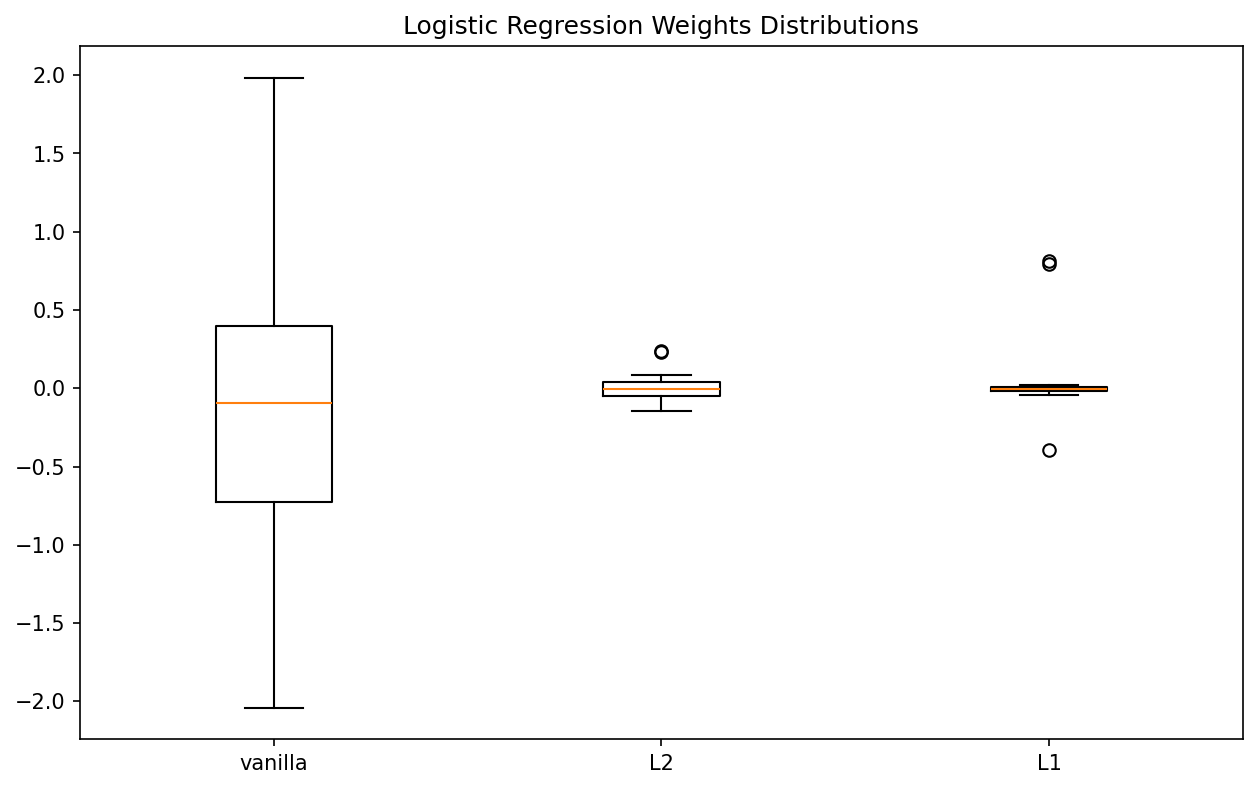

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[10,6],dpi=150)
plt.boxplot([weight_df['vanilla'],weight_df['L2'],weight_df['L1']],labels=['vanilla','L2','L1'])
plt.title('Logistic Regression Weights Distributions')


In [186]:
from sklearn.linear_model import LogisticRegression
lm1=LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',max_iter=500)
lm1.fit(X_train[['ph', 'aniongap', 'bun', 'ck_cpk']],y_train)
print(y_train.value_counts())
print(lm1.classes_)
print(lm1.coef_)
print(lm1.intercept_)
print(lm1.n_features_in_,lm1.feature_names_in_)
print(lm1.n_iter_)
print(np.unique(lm1.predict(X_test[['ph', 'aniongap', 'bun', 'ck_cpk']]),return_counts=True))
pred_lm1=lm1.predict_proba(X_test[['ph', 'aniongap', 'bun', 'ck_cpk']])
auroc = roc_auc_score(y_test,pred_lm1,multi_class='ovr')
ap = average_precision_score(y_test,pred_lm1)
pred_lm1_label=lm1.predict(X_test[['ph', 'aniongap', 'bun', 'ck_cpk']])
ac=accuracy_score(y_test,pred_lm1_label)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))

aki
2    782
3    588
1    377
0    369
Name: count, dtype: int64
[0 1 2 3]
[[-0.03697137  0.03665752 -0.24863799  0.        ]
 [ 0.06949128 -0.01856002 -0.02994292 -0.04811654]
 [ 0.06651309 -0.16984981  0.01419282 -0.01888766]
 [-0.10047492  0.15333561  0.28496206  0.14782379]]
[-0.27734405 -0.20214819  0.54258242 -0.06309018]
4 ['ph' 'aniongap' 'bun' 'ck_cpk']
[29]
(array([2, 3], dtype=int64), array([703, 205], dtype=int64))
On test dataset: AUROC 0.625474, AP 0.350702, Accuracy 0.451542


[[0.17736196 0.18945813 0.43108569 0.20209422]
 [0.19229595 0.19813547 0.43392396 0.17564462]
 [0.17116092 0.19262073 0.39382952 0.24238882]
 ...
 [0.17228068 0.19877077 0.48987014 0.13907842]
 [0.18181482 0.18629053 0.40845523 0.22343943]
 [0.18026414 0.2005697  0.41186913 0.20729703]]
24848    2
18169    1
32659    3
2383     2
3581     0
        ..
491      2
1658     2
18542    2
13362    2
28411    1
Name: aki, Length: 908, dtype: int64


C:\Users\13509\AppData\Local\Temp\ipykernel_25756\945303392.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
C:\Users\13509\AppData\Local\Temp\ipykernel_25756\945303392.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


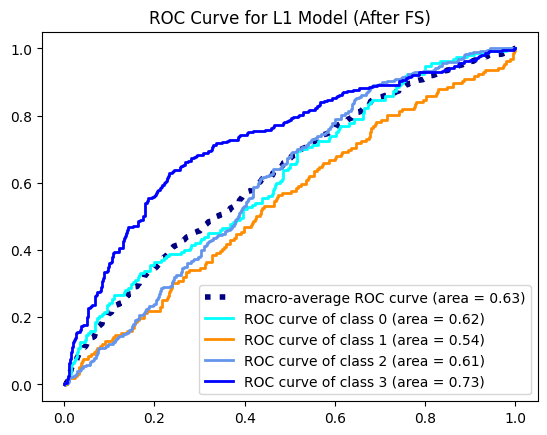

In [190]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
n_classes=4
y_score_lm2=lm1.predict_proba(X_test[['ph', 'aniongap', 'bun', 'ck_cpk']])
print(y_score_lm2)
print(y_test)
y_test_bi=label_binarize(y_test,classes=[0,1,2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_lm2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

lw=2
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.legend(loc="lower right")
plt.title('ROC Curve for L1 Model (After FS)')
plt.show()

In [188]:
print(y_train.value_counts())
from sklearn.linear_model import LogisticRegression
lm2=LogisticRegression(penalty='l2',solver='saga',multi_class='multinomial',max_iter=500)
lm2.fit(X_train[['ph','aniongap', 'bun', 'sodium','ck_cpk', 
'chloride'
]],y_train)

print(lm2.classes_)
print(lm2.coef_)
print(lm2.intercept_)
print(lm2.n_features_in_,lm2.feature_names_in_)
print(lm2.n_iter_)
print(np.unique(lm2.predict(X_test[['ph','aniongap', 'bun', 'sodium','ck_cpk', 
'chloride'
]]),return_counts=True))
pred_lm2=lm2.predict_proba(X_test[['ph','aniongap', 'bun', 'sodium','ck_cpk', 
'chloride'
]])
auroc = roc_auc_score(y_test,pred_lm2,multi_class='ovr',average='macro')
ap = average_precision_score(y_test,pred_lm2)
pred_lm2_label=lm2.predict(X_test[['ph','aniongap', 'bun', 'sodium','ck_cpk', 
'chloride'
]])
ac=accuracy_score(y_test,pred_lm2_label)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))

aki
2    782
3    588
1    377
0    369
Name: count, dtype: int64
[0 1 2 3]
[[-0.04814979  0.02572543 -0.25320749  0.15563796 -0.01244374 -0.06483215]
 [ 0.07339219 -0.01626467 -0.03593301 -0.02730302 -0.07444075  0.01485395]
 [ 0.07591898 -0.16716088  0.0112856   0.02197485 -0.04107084  0.02166701]
 [-0.10116137  0.15770012  0.2778549  -0.15030978  0.12795533  0.02831119]]
[-0.30176155 -0.19412986  0.54612777 -0.05023636]
6 ['ph' 'aniongap' 'bun' 'sodium' 'ck_cpk' 'chloride']
[17]
(array([0, 2, 3], dtype=int64), array([  4, 697, 207], dtype=int64))
On test dataset: AUROC 0.625496, AP 0.357245, Accuracy 0.461454


[[0.17814082 0.18836466 0.446873   0.18662153]
 [0.18231321 0.20058901 0.43709489 0.18000288]
 [0.23314938 0.18209597 0.40242781 0.18232685]
 ...
 [0.18704415 0.19568594 0.48804792 0.12922199]
 [0.15057549 0.19056139 0.34940139 0.30946174]
 [0.18501902 0.20050298 0.41156891 0.20290908]]
24848    2
18169    1
32659    3
2383     2
3581     0
        ..
491      2
1658     2
18542    2
13362    2
28411    1
Name: aki, Length: 908, dtype: int64


C:\Users\13509\AppData\Local\Temp\ipykernel_25756\3204580172.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
C:\Users\13509\AppData\Local\Temp\ipykernel_25756\3204580172.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


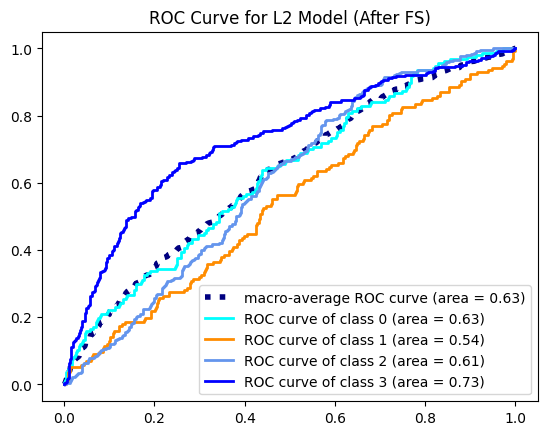

In [191]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
n_classes=4
y_score_lm2=lm2.predict_proba(X_test[['ph','aniongap', 'bun', 'sodium','ck_cpk', 
'chloride'
]])
print(y_score_lm2)
print(y_test)
y_test_bi=label_binarize(y_test,classes=[0,1,2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_lm2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

lw=2
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.legend(loc="lower right")
plt.title('ROC Curve for L2 Model (After FS)')
plt.show()

In [24]:

coef2=lm2.coef_
coef1=lm1.coef_
weight_sklearn=pd.DataFrame({'L2':coef2.flatten(),
'L1':coef1.flatten()
})
weight_sklearn

,L2,L1
0,-0.205936,-0.178416
1,0.044462,0.000000
2,-0.139153,-0.154024
3,-0.028226,-0.015100
4,-0.243037,-0.239814
...,...,...
27,0.158518,0.162130
28,0.270464,0.273310
29,0.120310,0.133238
30,0.106962,0.091599


Text(0.5, 1.0, 'Logistic Regression Weights Distributions')

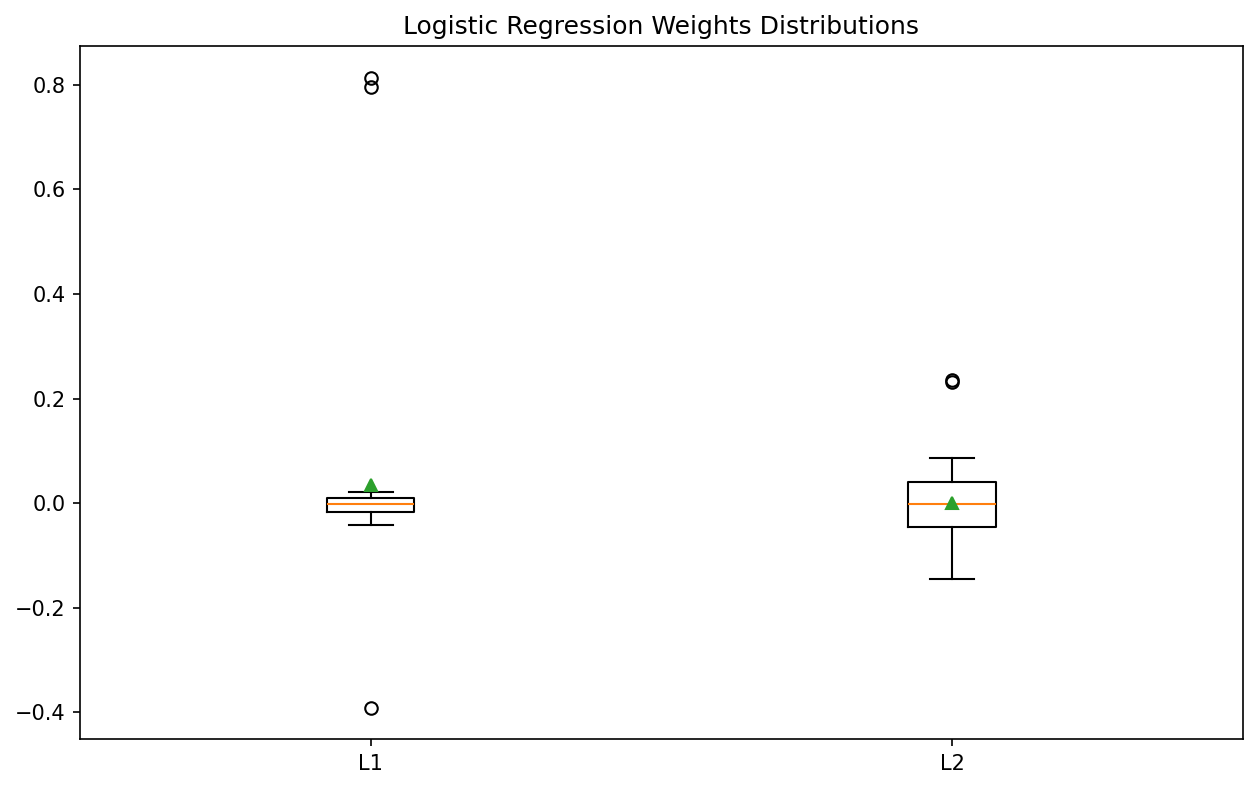

In [25]:
fig=plt.figure(figsize=[10,6],dpi=150)
plt.boxplot([weight_df['L1'],weight_df['L2']],labels=['L1','L2'],showmeans='True')

plt.title('Logistic Regression Weights Distributions')


In [175]:
from sklearn.feature_selection import SequentialFeatureSelector 
fselection=SequentialFeatureSelector(
    svmmodel, 
    n_features_to_select=4, 
    direction="forward"
).fit(X_train, y_train)
fselection.get_feature_names_out()

array(['baseexcess', 'aniongap', 'bun', 'potassium'], dtype=object)

In [176]:
bselection=SequentialFeatureSelector(
    svmmodel, 
    n_features_to_select=4, 
    direction="backward"
).fit(X_train, y_train)
bselection.get_feature_names_out()

array(['ph', 'aniongap', 'bun', 'ck_cpk'], dtype=object)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

In [193]:
dct=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=6004)
dct.fit(X_train[['ph','aniongap', 'bun','sodium']],y_train)
plt.figure(figsize=(14,10))
#tree.plot_tree(dct)

pred_dct=dct.predict_proba(X_test[['ph','aniongap', 'bun','sodium']])
#pred_dct=label_binarize(pred_dct,classes=[0,1,2,3])
print(y_test_bi,pred_dct)
auroc = roc_auc_score(y_test,pred_dct,multi_class='ovr',average='macro')
ap = average_precision_score(y_test ,pred_dct)
pred_dct=dct.predict(X_test[['ph','aniongap', 'bun','sodium']])
ac=accuracy_score(y_test,pred_dct)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))
def dctgridsearch(max_depth_param):
    best_depth=0
    best_auc_roc=0
    best_accuracy=0
    for p in max_depth_param:
        model=DecisionTreeClassifier(criterion="entropy",max_depth=p,random_state=6004)
        model.fit(X_train[['ph','aniongap', 'bun','sodium']],y_train)
        pred_dct_g=model.predict_proba(X_test[['ph','aniongap', 'bun','sodium']])
        #pred_dct_g=label_binarize(pred_dct_g,classes=[0,1,2,3])
        auroc = roc_auc_score(y_test,pred_dct_g,multi_class='ovr',average='macro')
        ap = average_precision_score(y_test,pred_dct_g)
        pred_dct_g=model.predict(X_test[['ph','aniongap', 'bun','sodium']])
        ac=accuracy_score(y_test,pred_dct_g)
        if 0.5* auroc + 0.5 * ac> 0.5* best_auc_roc + 0.5*best_accuracy:
            best_depth=p
            best_auc_roc=auroc
            best_accuracy=ac
    return best_depth,best_auc_roc,best_accuracy
max_depth_param=[i for i in range(1,102,1)]

print(dctgridsearch(max_depth_param))

[[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]] [[0.0974359  0.18205128 0.48461538 0.23589744]
 [0.23593466 0.19963702 0.38475499 0.17967332]
 [0.0974359  0.18205128 0.48461538 0.23589744]
 ...
 [0.24207493 0.21902017 0.46685879 0.07204611]
 [0.0974359  0.18205128 0.48461538 0.23589744]
 [0.0974359  0.18205128 0.48461538 0.23589744]]
On test dataset: AUROC 0.616473, AP 0.326381, Accuracy 0.449339
(3, 0.6164730014650168, 0.44933920704845814)


<Figure size 1400x1000 with 0 Axes>

[[0.0974359  0.18205128 0.48461538 0.23589744]
 [0.23593466 0.19963702 0.38475499 0.17967332]
 [0.0974359  0.18205128 0.48461538 0.23589744]
 ...
 [0.24207493 0.21902017 0.46685879 0.07204611]
 [0.0974359  0.18205128 0.48461538 0.23589744]
 [0.0974359  0.18205128 0.48461538 0.23589744]]
24848    2
18169    1
32659    3
2383     2
3581     0
        ..
491      2
1658     2
18542    2
13362    2
28411    1
Name: aki, Length: 908, dtype: int64


C:\Users\13509\AppData\Local\Temp\ipykernel_25756\1246322853.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
C:\Users\13509\AppData\Local\Temp\ipykernel_25756\1246322853.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


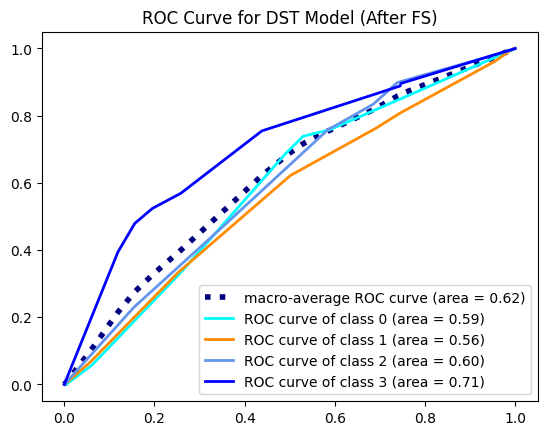

In [196]:
n_classes=4
y_score_lm2=dct.predict_proba(X_test[['ph','aniongap', 'bun','sodium']])
#y_score_lm2=label_binarize(y_score_lm2,classes=[0,1,2,3])
print(y_score_lm2)
print(y_test)
y_test_bi=label_binarize(y_test,classes=[0,1,2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_lm2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

lw=2
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.legend(loc="lower right")
plt.title('ROC Curve for DST Model (After FS)')
plt.show()

In [200]:
from sklearn import svm
svmmodel=svm.SVC(C=8,kernel='rbf',decision_function_shape='ovr',probability = True)
svmmodel.fit(X_train[['aniongap','bun','potassium','ph','ck_cpk']],y_train)
pred_svm=svmmodel.predict_proba(X_test[['aniongap','bun','potassium','ph','ck_cpk']])
print(pred_svm)
#pred_svm=label_binarize(pred_svm,classes=[0,1,2,3])
auroc = roc_auc_score(y_test,pred_svm,multi_class='ovr',average='macro')
ap = average_precision_score(y_test,pred_svm)
pred_svm=svmmodel.predict(X_test[['aniongap','bun','potassium','ph','ck_cpk']])
ac=accuracy_score(y_test,pred_svm)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))
max_c_param=[i for i in range(1,20,1)]
def svmgridsearch(max_c_param):
    best_c=0
    best_auc_roc=0
    best_accuracy=0
    for c in max_c_param:
        model=svm.SVC(C=c,kernel='rbf',decision_function_shape='ovr',probability = True)
        model.fit(X_train[['aniongap','bun','potassium','ph','ck_cpk']],y_train)
        pred_dct_g=model.predict_proba(X_test[['aniongap','bun','potassium','ph','ck_cpk']])
        #pred_dct_g=label_binarize(pred_dct_g,classes=[0,1,2,3])
        auroc = roc_auc_score(y_test,pred_dct_g,multi_class='ovr',average='macro')
        ap = average_precision_score(y_test,pred_dct_g)
        pred_dct_g=model.predict(X_test[['aniongap','bun','potassium','ph','ck_cpk']])
        ac=accuracy_score(y_test,pred_dct_g)
        if 0.5* auroc + 0.5 * ac> 0.5* best_auc_roc + 0.5*best_accuracy:
            best_c=c
            best_auc_roc=auroc
            best_accuracy=ac
    return best_c,best_auc_roc,best_accuracy

#print(svmgridsearch(max_c_param))

[[0.14985773 0.2035576  0.43993759 0.20664708]
 [0.21295359 0.20418286 0.44757238 0.13529117]
 [0.13632232 0.17376272 0.43048277 0.25943219]
 ...
 [0.20857228 0.20506668 0.43899586 0.14736517]
 [0.14922693 0.19421474 0.43682749 0.21973085]
 [0.16867833 0.19368012 0.44053559 0.19710597]]
On test dataset: AUROC 0.638156, AP 0.363178, Accuracy 0.460352


[[0.14985773 0.2035576  0.43993759 0.20664708]
 [0.21295359 0.20418286 0.44757238 0.13529117]
 [0.13632232 0.17376272 0.43048277 0.25943219]
 ...
 [0.20857228 0.20506668 0.43899586 0.14736517]
 [0.14922693 0.19421474 0.43682749 0.21973085]
 [0.16867833 0.19368012 0.44053559 0.19710597]]
24848    2
18169    1
32659    3
2383     2
3581     0
        ..
491      2
1658     2
18542    2
13362    2
28411    1
Name: aki, Length: 908, dtype: int64


C:\Users\13509\AppData\Local\Temp\ipykernel_25756\1472513595.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
C:\Users\13509\AppData\Local\Temp\ipykernel_25756\1472513595.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


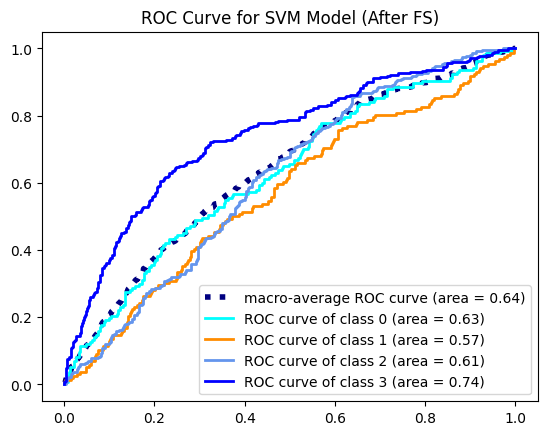

In [201]:
n_classes=4
y_score_lm2=svmmodel.predict_proba(X_test[['aniongap','bun','potassium','ph','ck_cpk']])
#y_score_lm2=label_binarize(y_score_lm2,classes=[0,1,2,3])
print(y_score_lm2)
print(y_test)
y_test_bi=label_binarize(y_test,classes=[0,1,2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_lm2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

lw=2
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.legend(loc="lower right")
plt.title('ROC Curve for SVM Model (After FS)')
plt.show()

In [140]:
from statsmodels.discrete.discrete_model import Logit,MNLogit

y_train_binary=y_train.copy()

y_train_binary[y_train_binary!=0]=1
y_train_binary
y_test_binary=y_test.copy()

y_test_binary[y_test_binary!=0]=1
y_test_binary

lm_bi=Logit(y_train_binary,X_train)
res_bi=lm_bi.fit()
res_bi.summary()
y_train_binary.value_counts()


Optimization terminated successfully.
         Current function value: 0.643178
         Iterations 6


aki
1    1747
0     369
Name: count, dtype: int64

In [129]:
lm_b=LogisticRegression(max_iter=500)
lm_b.fit(X_train,y_train_binary)
print(lm_b.classes_)
print(lm_b.coef_)
print(lm_b.intercept_)
print(lm_b.n_features_in_,lm_b.feature_names_in_)
print(lm_b.n_iter_)
print(np.unique(lm_b.predict(X_test),return_counts=True))
pred_lmb=lm_b.predict(X_test)

auroc = roc_auc_score(y_test_binary,pred_lmb,multi_class='ovo')
ap = average_precision_score(y_test_binary,pred_lmb)
ac=accuracy_score(y_test_binary,pred_lmb)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))

[0 1]
[[ 0.27363023 -0.06545264  0.17735689  0.05407623  0.34507587  0.05261322
   0.14480773 -0.28143535]]
[1.62523233]
8 ['baseexcess' 'ph' 'chloride' 'aniongap' 'bun' 'ck_cpk' 'potassium'
 'sodium']
[13]
(array([1], dtype=int64), array([908], dtype=int64))
On test dataset: AUROC 0.500000, AP 0.827093, Accuracy 0.827093


In [130]:
from sklearn.feature_selection import SequentialFeatureSelector 
fselection=SequentialFeatureSelector(
    lm_b, 
    n_features_to_select=4, 
    direction="forward"
).fit(X_train, y_train_binary)
fselection.get_feature_names_out()

array(['baseexcess', 'ph', 'chloride', 'aniongap'], dtype=object)

In [131]:
bselection=SequentialFeatureSelector(
    lm_b, 
    n_features_to_select=4, 
    direction="backward"
).fit(X_train, y_train_binary)
bselection.get_feature_names_out()

array(['bun', 'ck_cpk', 'potassium', 'sodium'], dtype=object)

In [141]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(random_state=12,sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote_sampler.fit_resample(X_train, y_train_binary)
y_train_SMOTE.value_counts()

aki
0    1747
1    1747
Name: count, dtype: int64

In [142]:
lm_add=LogisticRegression(max_iter=500000)
lm_add.fit(X_train[['baseexcess', 'ph', 'chloride']],y_train_binary)
print(lm_add.classes_)
print(lm_add.coef_)
print(lm_add.intercept_)
print(lm_add.n_features_in_,lm_add.feature_names_in_)
print(lm_add.n_iter_)
print(np.unique(lm_add.predict(X_test[['baseexcess', 'ph', 'chloride']]),return_counts=True))
pred_lmadd=lm_add.predict(X_test[['baseexcess', 'ph', 'chloride']])

auroc = roc_auc_score(y_test_binary,pred_lmadd,multi_class='ovo')
ap = average_precision_score(y_test_binary,pred_lmadd)
ac=accuracy_score(y_test_binary,pred_lmadd)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))

[0 1]
[[-0.02852376  0.02235434 -0.01448739]]
[1.55454714]
3 ['baseexcess' 'ph' 'chloride']
[9]
(array([1], dtype=int64), array([908], dtype=int64))
On test dataset: AUROC 0.500000, AP 0.827093, Accuracy 0.827093


In [143]:
lm_add.fit(X_train_SMOTE,y_train_SMOTE)
print(lm_add.classes_)
print(lm_add.coef_)
print(lm_add.intercept_)
print(lm_add.n_features_in_,lm_add.feature_names_in_)
print(lm_add.n_iter_)
print(np.unique(lm_add.predict(X_test),return_counts=True))
pred_lmadd=lm_add.predict(X_test)

auroc = roc_auc_score(y_test_binary,pred_lmadd,multi_class='ovo')
ap = average_precision_score(y_test_binary,pred_lmadd)
ac=accuracy_score(y_test_binary,pred_lmadd)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))

[0 1]
[[ 0.31065195 -0.06806993  0.17297555  0.08371907  0.35451698  0.11906858
   0.23016627 -0.28533184]]
[0.08707852]
8 ['baseexcess' 'ph' 'chloride' 'aniongap' 'bun' 'ck_cpk' 'potassium'
 'sodium']
[12]
(array([0, 1], dtype=int64), array([490, 418], dtype=int64))
On test dataset: AUROC 0.566519, AP 0.847069, Accuracy 0.512115


On test dataset: AUROC 0.524960, AP 0.834332, Accuracy 0.589207


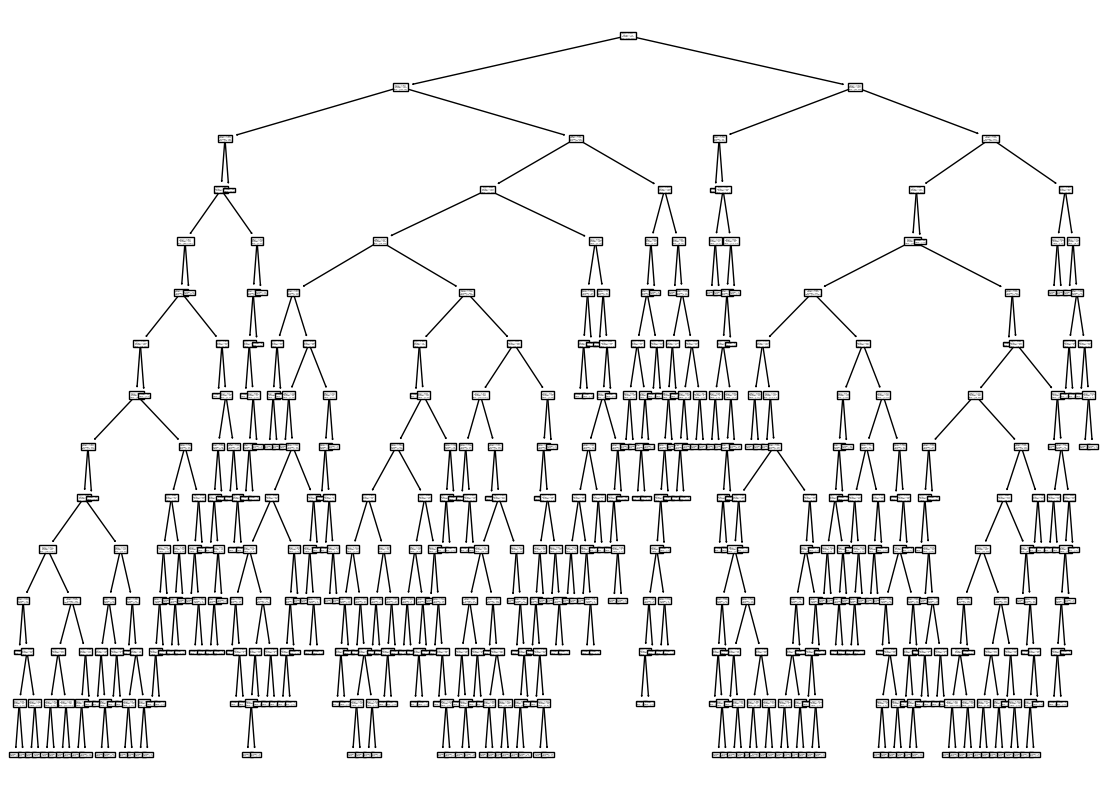

In [145]:
dct=DecisionTreeClassifier(criterion="entropy",max_depth=4)
dct.fit(X_train_SMOTE,y_train_SMOTE)
plt.figure(figsize=(14,10))
tree.plot_tree(dct)
pred_dct=dct.predict(X_test)
auroc = roc_auc_score(y_test_binary,pred_dct,multi_class='ovo')
ap = average_precision_score(y_test_binary,pred_dct)
ac=accuracy_score(y_test_binary,pred_dct)
print('On test dataset: AUROC {:.6f}, AP {:.6f}, Accuracy {:.6f}'.format(auroc,ap,ac))